# Fitten aan *solar cooking box*-data

We importeren de benodigde bibliotheken:

In [1]:
import pandas as pd
from lmfit import models
import numpy as np

En dan de datafile. Dit is niet de oorspronkelijke file die Jonas mij stuurde. Ik heb handmatig op schijf het eind eraf geknipt (leek een korte tweede dataset) en de line endings aangepast (was \r\n\r, nu \n). Dit komt waarschijnlijk door het exporteren vanuit Origin. Ik verwacht dat de originele file uit Logger Pro veel makkelijker leesbaar is.

In [2]:
data = pd.read_csv('SCB.txt', skiprows=[1, 2], delimiter='\t', decimal=',')
data.head()

,Time,Temperature 1,Temperature 2,Temperature 3,Temperature 4
0,0.0,25.936607,24.823212,23.801753,23.080756
1,0.5,26.609270,27.189299,23.685470,22.987734
2,1.0,28.630179,28.909750,23.708691,23.104008
3,1.5,30.661762,29.912879,23.685470,22.917953
4,2.0,32.498283,30.614925,23.731910,23.057503


Even snel plotten:

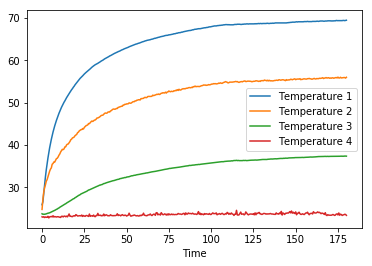

In [3]:
data.plot(x='Time')

## Snelle fit aan de data

We gaan nu het model definiëren én de parameters initialiseren (dat is belangrijk). Het model wordt gegeven door:
$$
T(t) = T_\mathrm{b} + \frac{Q_\mathrm{in}}{k} \left(1 - e^{-\frac{k}{C}t}\right).
$$
De parameters initialiseren we gewoon op 1. Als je níet initialiseert, krijg je een *exception*, namelijk ``ValueError: The input contains nan values``. Deze foutmelding is weinig informatief helaas.

In [4]:
model = models.Model(lambda t, Tb, Qin, k, C: Tb + Qin / k * (1 - np.exp(-k / C * t)))
params = model.make_params(Tb=1, Qin=1, k=1, C=1)

De fit zelf:

In [5]:
fit = model.fit(data['Temperature 1'], t=data['Time'], params=params)

Het resultaat plotten:

(<Figure size 432x432 with 2 Axes>,
 <matplotlib.gridspec.GridSpec at 0x117e347b8>)

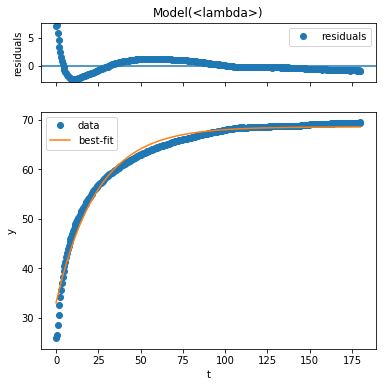

In [6]:
fit.plot()

En laat nu de gevonden parameters maar eens zien:

In [7]:
print(fit.fit_report())

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 84
    # data points      = 361
    # variables        = 4
    chi-square         = 459.309278
    reduced chi-square = 1.28658061
    Akaike info crit   = 94.9453457
    Bayesian info crit = 110.500858
[[Variables]]
    Tb:   33.0390748 +/- 0.33058575 (1.00%) (init = 1)
    Qin: -66.9197917 +/- 13930528.6 (20816754.30%) (init = 1)
    k:   -1.88568974 +/- 392538.322 (20816697.09%) (init = 1)
    C:   -45.4109451 +/- 9453149.00 (20816895.54%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(Qin, k) =  1.000
    C(k, C)   =  1.000
    C(Qin, C) =  1.000



De fit geeft dus een resultaat wanneer álle parameters worden vrijgelaten. Je ziet dat er meteen iets misgaat met de mintekens, bijvoorbeeld. Je kunt er vervolgens nog mee spelen en parameters vastzetten. Maar ik weet nu niet precies wat realistische waardes zijn, bijvoorbeeld voor $C$.

## Parameter-ruimte vastleggen

De waarde van $Q_\mathrm{in}, k$ en $C$ moet positief zijn:

In [8]:
params['Qin'].min = 0
params['k'].min = 0
params['C'].min = 0
params

Parameters([('Tb', <Parameter 'Tb', 1, bounds=[-inf:inf]>),
            ('Qin', <Parameter 'Qin', 1, bounds=[0:inf]>),
            ('k', <Parameter 'k', 1, bounds=[0:inf]>),
            ('C', <Parameter 'C', 1, bounds=[0:inf]>)])

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 248
    # data points      = 361
    # variables        = 4
    chi-square         = 459.309277
    reduced chi-square = 1.28658061
    Akaike info crit   = 94.9453451
    Bayesian info crit = 110.500857
[[Variables]]
    Tb:   33.0390064 +/- 0.33109992 (1.00%) (init = 1)
    Qin:  437.022007 +/- 24060312.8 (5505515.14%) (init = 1)
    k:    12.3145209 +/- 677942.385 (5505227.47%) (init = 1)
    C:    296.557455 +/- 16326756.0 (5505427.61%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(Qin, k) =  1.000
    C(k, C)   =  1.000
    C(Qin, C) =  1.000



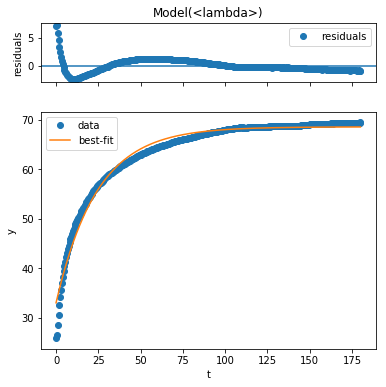

In [9]:
fit = model.fit(data['Temperature 1'], t=data['Time'], params=params)
fit.plot()
print(fit.fit_report())

Merk op dat de waardes van de parameters heel anders zijn, maar de $\chi^2$ exact hetzelfde.

## Vastzetten van een parameter

Gewoonlijk wordt de warmtecapaciteit $C$ vastgezet. Ik weet eerlijk gezegd geen realistische waarde, dus ik heb een waarde genomen uit een logboek en afgerond.

In [10]:
params['C'].value = 1000
params['C'].vary = False
params

Parameters([('Tb', <Parameter 'Tb', 1, bounds=[-inf:inf]>),
            ('Qin', <Parameter 'Qin', 1, bounds=[0:inf]>),
            ('k', <Parameter 'k', 1, bounds=[0:inf]>),
            ('C', <Parameter 'C', value=1000 (fixed), bounds=[0:inf]>)])

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 117
    # data points      = 361
    # variables        = 3
    chi-square         = 459.309278
    reduced chi-square = 1.28298681
    Akaike info crit   = 92.9453458
    Bayesian info crit = 104.611980
[[Variables]]
    Tb:   33.0388339 +/- 0.33010078 (1.00%) (init = 1)
    Qin:  1473.67404 +/- 32.9179780 (2.23%) (init = 1)
    k:    41.5254071 +/- 0.66700496 (1.61%) (init = 1)
    C:    1000 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(Qin, k)  =  0.942
    C(Tb, Qin) = -0.887
    C(Tb, k)   = -0.692



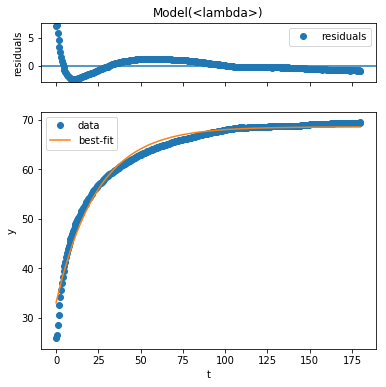

In [11]:
fit = model.fit(data['Temperature 1'], t=data['Time'], params=params)
fit.plot()
print(fit.fit_report())

Vanwege de afhankelijkheid van de parameters is dit geen enkel probleem, en krijgen we weer exact dezelfde fit. Maar nu, hopelijk, met een meer realistische waarde van $k$. Toch past de fit niet helemaal over de data. Het model is blijkbaar onvolledig.

## Temperatuursafhankelijke $k$

Jonas verwacht dat het beter gaat met een temperatuursafhankelijkheid in de warmtegeleidingscoëfficiënt $k$. Dit is vooral zichtbaar bij de verschillende waardes voor $k$ bij de opwarm- en afkoelcurves. Maar deze dataset heeft geen afkoelcurve.

We definiëren $k$ als een lineaire functie:

In [12]:
k = lambda t, a, b: a * t + b

En passen het model een klein beetje aan, met een waarde van 0 voor een vlakke temperatuursafhankelijkheid van $k$:

In [13]:
model = models.Model(lambda t, Tb, Qin, a, b, C: Tb + Qin / k(t, a, b) * (1 - np.exp(-k(t, a, b) / C * t)))
params = model.make_params(Tb=1, Qin=1, a=0, b=1, C=1)

In [14]:
params['Qin'].min = 0
params['C'].value = 1000
params['C'].vary = False
params

Parameters([('Tb', <Parameter 'Tb', 1, bounds=[-inf:inf]>),
            ('Qin', <Parameter 'Qin', 1, bounds=[0:inf]>),
            ('a', <Parameter 'a', 0, bounds=[-inf:inf]>),
            ('b', <Parameter 'b', 1, bounds=[-inf:inf]>),
            ('C', <Parameter 'C', value=1000 (fixed), bounds=[-inf:inf]>)])

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 191
    # data points      = 361
    # variables        = 4
    chi-square         = 220.322878
    reduced chi-square = 0.61715092
    Akaike info crit   = -170.255974
    Bayesian info crit = -154.700462
[[Variables]]
    Tb:   30.1210071 +/- 0.28169064 (0.94%) (init = 1)
    Qin:  2079.06944 +/- 44.2185480 (2.13%) (init = 1)
    a:   -0.05236705 +/- 0.00263476 (5.03%) (init = 0)
    b:    61.2039587 +/- 1.11478884 (1.82%) (init = 1)
    C:    1000 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(Qin, b)  =  0.932
    C(Tb, Qin) = -0.879
    C(a, b)    = -0.836
    C(Tb, b)   = -0.672
    C(Qin, a)  = -0.631
    C(Tb, a)   =  0.354



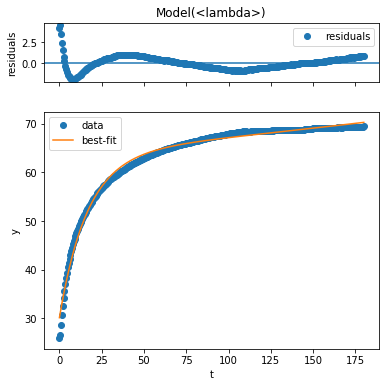

In [15]:
fit = model.fit(data['Temperature 1'], t=data['Time'], params=params, nan_policy='propagate')
fit.plot()
print(fit.fit_report())

De waarde van $\chi^2$ is lager, dus wellicht is dit wat beter. Maar we zijn er nog niet...